In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import os

In [2]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.5.0'

In [185]:
image_path = ["00003102d3ec9a46cb5cd2fd95473b8d.jpg"]
image_path += glob("imgs/*")

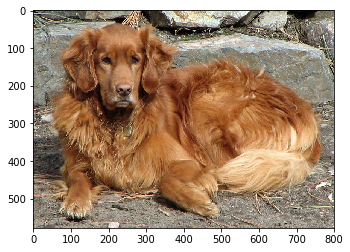

In [186]:
from PIL import Image
plt.imshow(Image.open(image_path[0]))

In [187]:
ResNet50 = tf.keras.applications.ResNet50
preprocess_input = tf.keras.applications.resnet50.preprocess_input
image = tf.keras.preprocessing.image

In [188]:
resnet_model = ResNet50(weights='imagenet', include_top=False)

In [189]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return resnet_model.predict(x)[0][0][0]

In [190]:
f = []
images = []
test_f = []
test_images = []
c = 1000
t = 10
for i in image_path:
    try:
        feat = extract_features(i)
        img = image.img_to_array(image.load_img(i, target_size=(size, size)))

        if t > 0:
            test_f.append(feat)
            test_images.append(img)
            t -= 1
            continue
        if c > 0:
            f.append(feat)
            images.append(img)
            c -= 1
            continue
        if t == 0:
            break
    except:
        pass
images = np.reshape(images, (len(images), size, size, 3)).astype('float32') / 255.
test_images = np.reshape(test_images, (len(test_images), size, size, 3)).astype('float32') / 255.

/usr/local/lib/python2.7/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python2.7/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 395876289 bytes but only got 0. Skipping tag 34464
  " Skipping tag %s" % (size, len(data), tag))


In [191]:
print(len(images), len(test_images))

(1000, 10)


In [193]:
size = 256

In [194]:
small_out = image.load_img(image_path[0], target_size=(size, size))

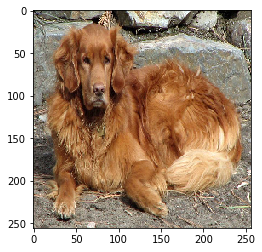

In [195]:
plt.imshow(small_out)

In [63]:
Input = tf.keras.layers.Input
Dense = tf.keras.layers.Dense
Conv2D = tf.keras.layers.Conv2D
MaxPooling2D = tf.keras.layers.MaxPooling2D
UpSampling2D = tf.keras.layers.UpSampling2D
Cropping2D = tf.keras.layers.Cropping2D
Conv2DTranspose = tf.keras.layers.Conv2DTranspose
BatchNormalization = tf.keras.layers.BatchNormalization
LeakyReLU = tf.keras.layers.LeakyReLU
Model = tf.keras.models.Model
Reshape = tf.keras.layers.Reshape
Adam = tf.keras.optimizers.Adam
#from tf.keras import backend as K

In [156]:
def conv_only():
    input_img = Input(shape=(2048, ))  # adapt this if using `channels_first` image data format

    x = Reshape([4, 4, 128] )(input_img)
    x = Conv2DTranspose(2048, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(1024, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(512, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(256, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(128, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(64, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    decoded = Conv2D(3, (4, 4), activation='sigmoid', padding='same')(x)

In [157]:
conv_size = (3, 3)
leaku_relu_alpha = 0.2

input_img = Input(shape=(2048, )) 
x = Reshape([4, 4, 128] )(input_img)
x = Conv2D(2048, conv_size, padding='same')(x) #activation='relu',
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1024, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(512, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)
#decoded = Conv2D(3, (2, 2), activation='tanh', padding='same')(x)

In [196]:
autoencoder = Model(input_img, decoded)
#optimizer = Adam(lr=0.001)  # lr=1e-3
#autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer="adadelta", loss='binary_crossentropy')

In [197]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 2048)        2361344   
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 4, 4, 2048)        0         
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 8, 8, 2048)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 1024)        18875392  
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 8, 8, 1024)        0         
__________

In [201]:
# TensorBoard = tf.keras.callbacks.TensorBoard

autoencoder.fit(np.array(f), 
                images,
                epochs=4000,
                batch_size=40,
                shuffle=True,
               )
                #validation_data=(x_test, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.6674

Epoch 2/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.6408

Epoch 3/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.6465

Epoch 4/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.6147

Epoch 5/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5970

Epoch 6/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.6039

Epoch 7/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5833

Epoch 8/4000
1000/1000 [==============================]1000/1000 [========================

1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5450

Epoch 64/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5326

Epoch 65/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5345

Epoch 66/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5329

Epoch 67/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5318

Epoch 68/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5302

Epoch 69/4000
1000/1000 [==============================]1000/1000 [==============================] - 10s 10ms/step - loss: 0.5397

Epoch 70/4000
1000/1000 [==============================]1000/1000 [==============================

KeyboardInterrupt: 

In [202]:
def show_image(image_n, f, images, save=""):
    decoded_img = autoencoder.predict(np.array([f[image_n]]))
    plt.figure(figsize=(28, 28))
    plt.subplot(1, 2, 1)
    plt.imshow(decoded_img.reshape(size, size, 3))
    plt.title('Generated', fontsize=30)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    #plt.imshow(image.load_img(image_path[image_n], target_size=(size, size)))
    plt.imshow(images[image_n])
    plt.title('Original', fontsize=30)
    plt.axis('off')
    #plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()

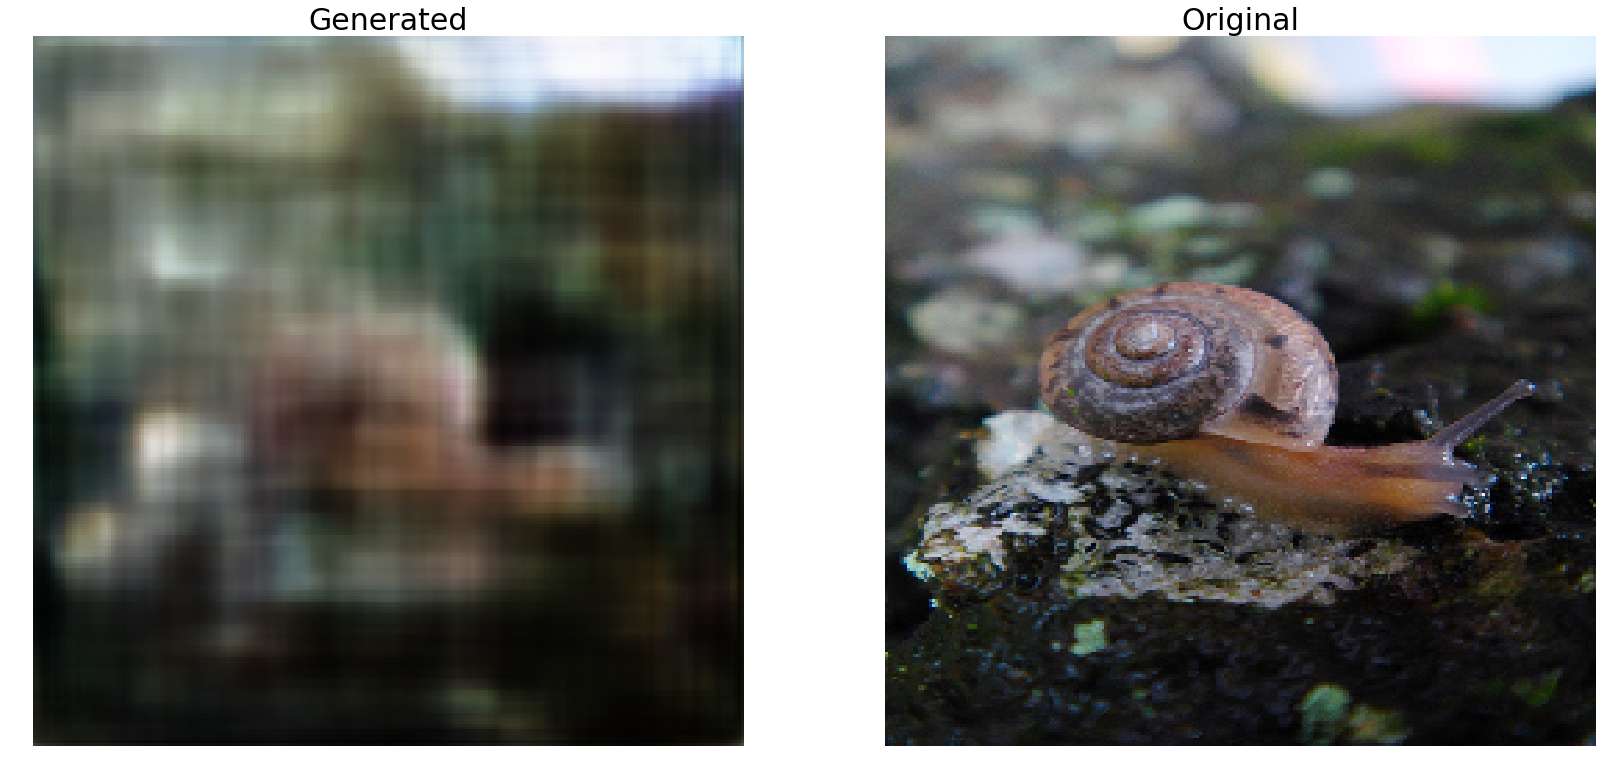

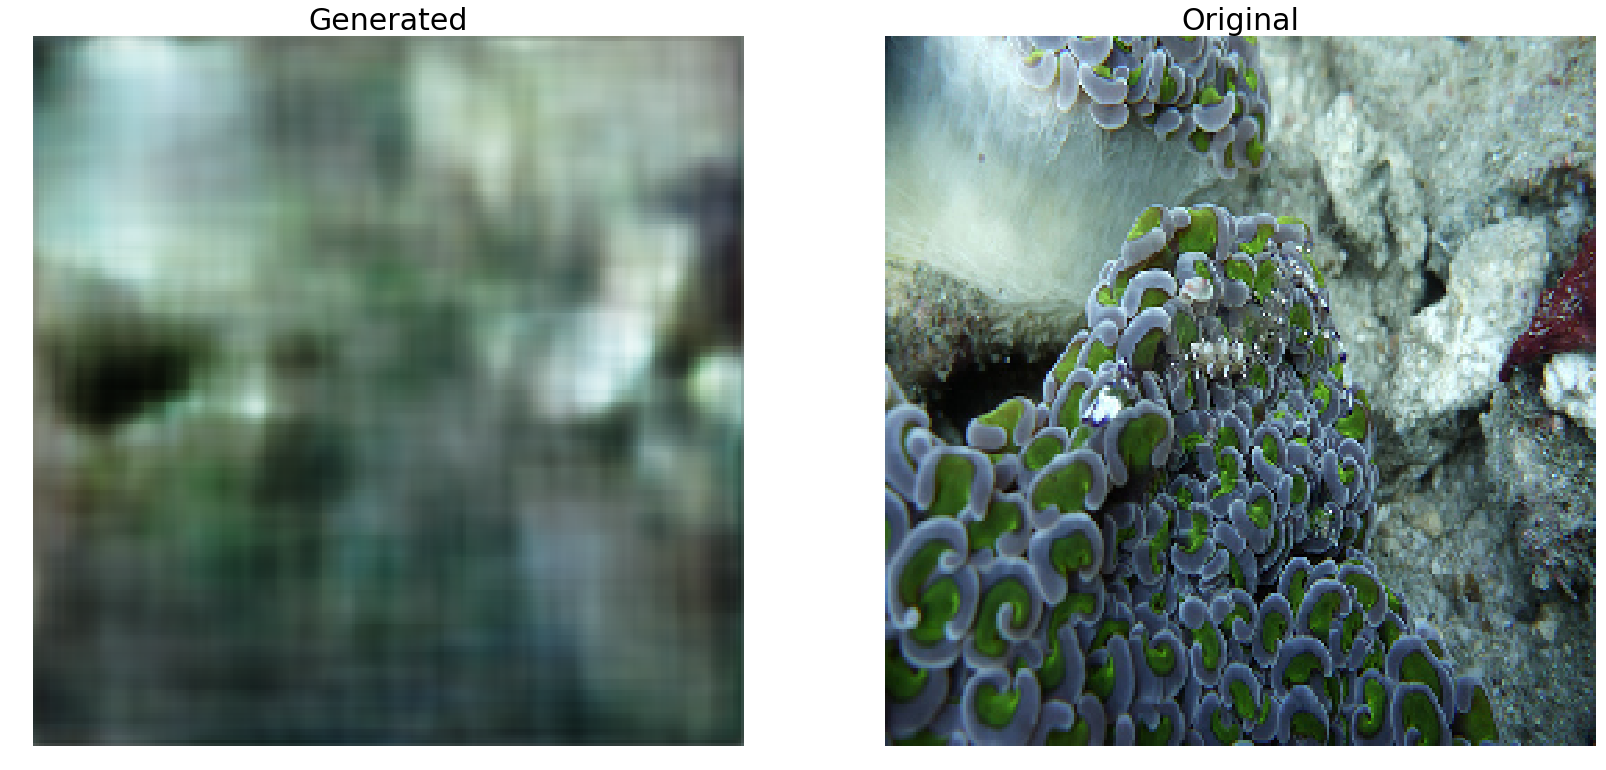

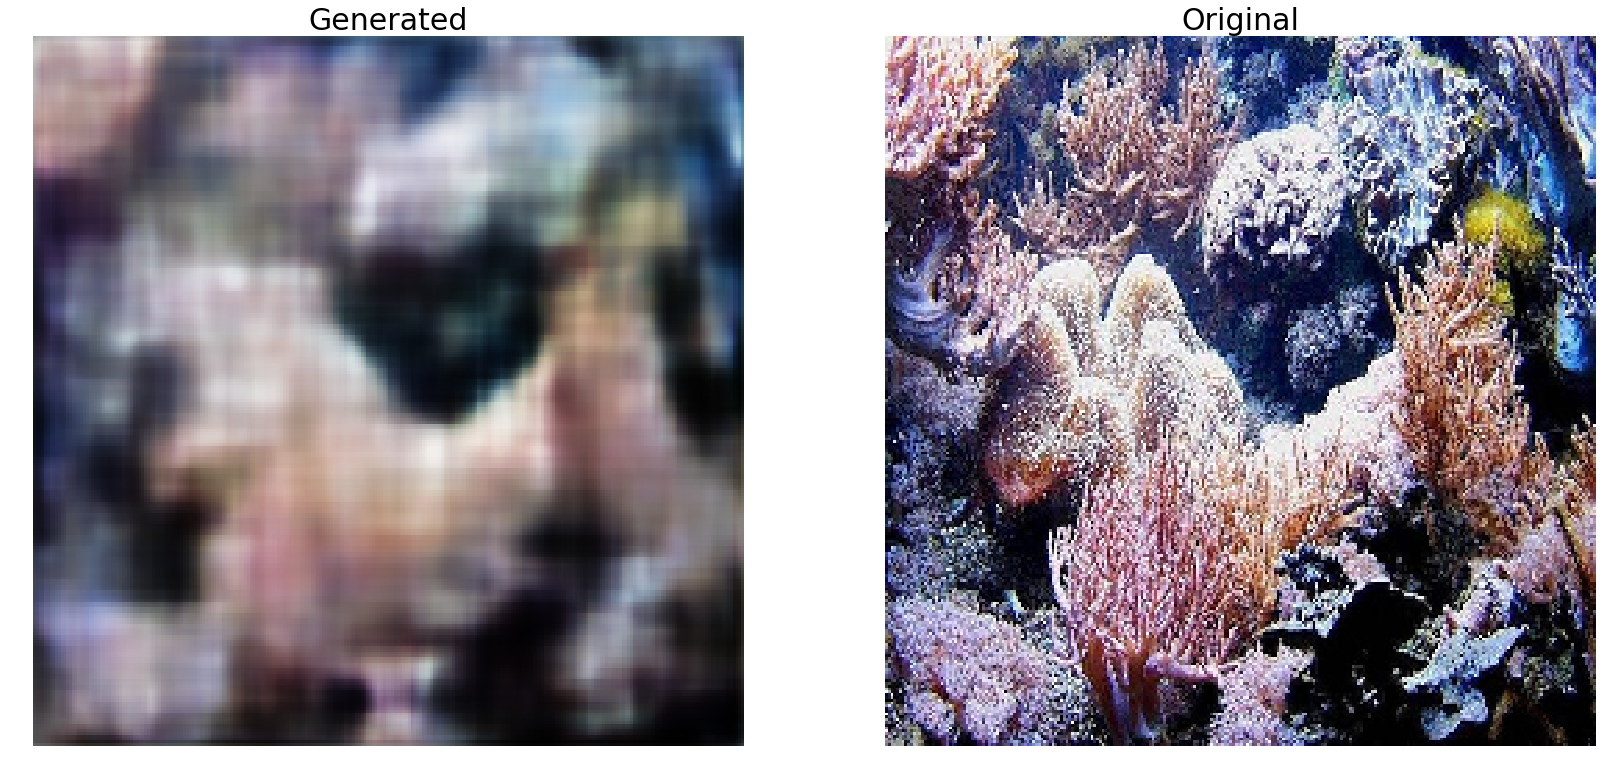

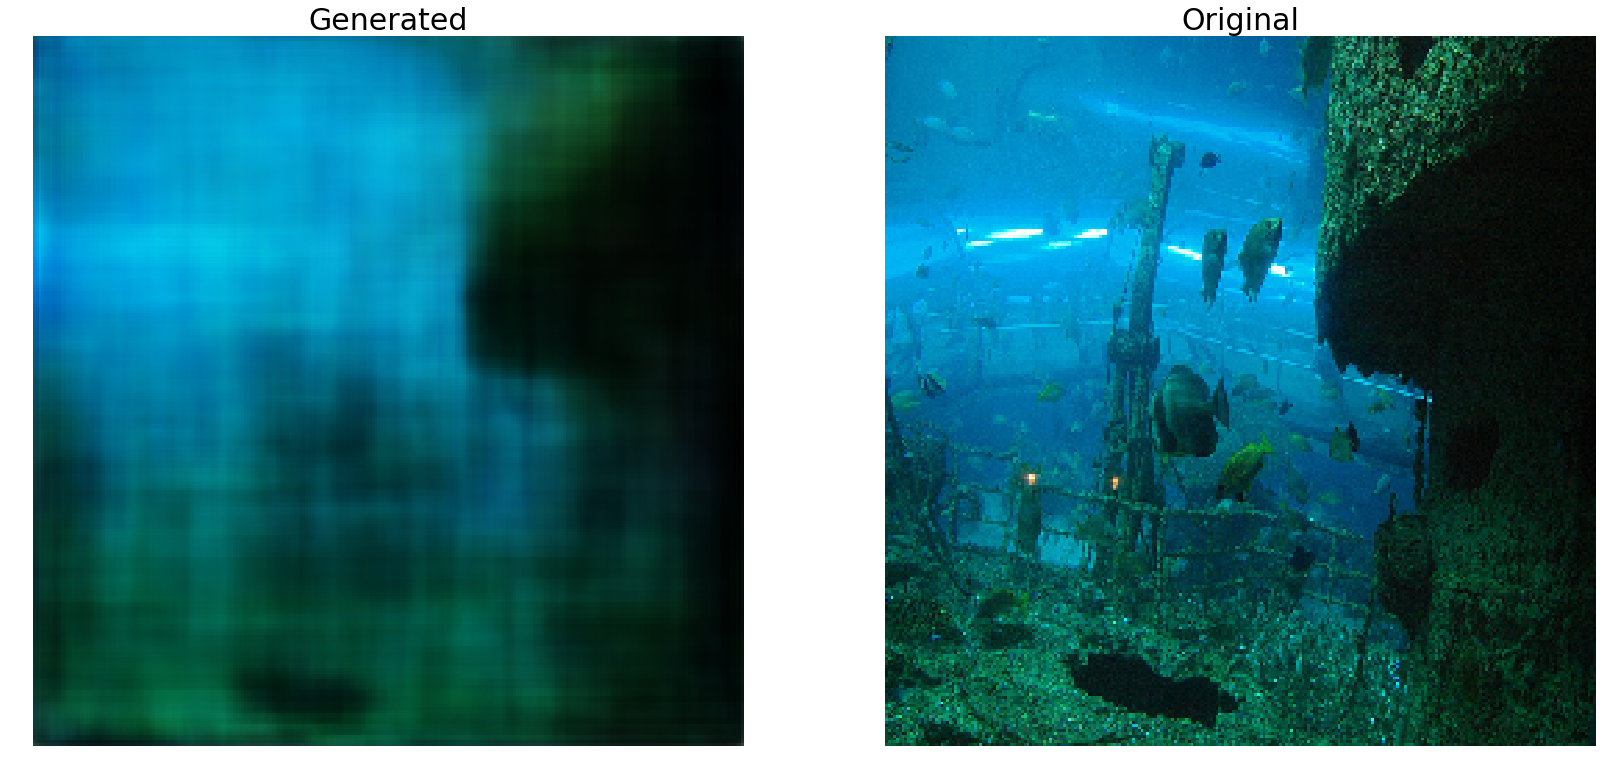

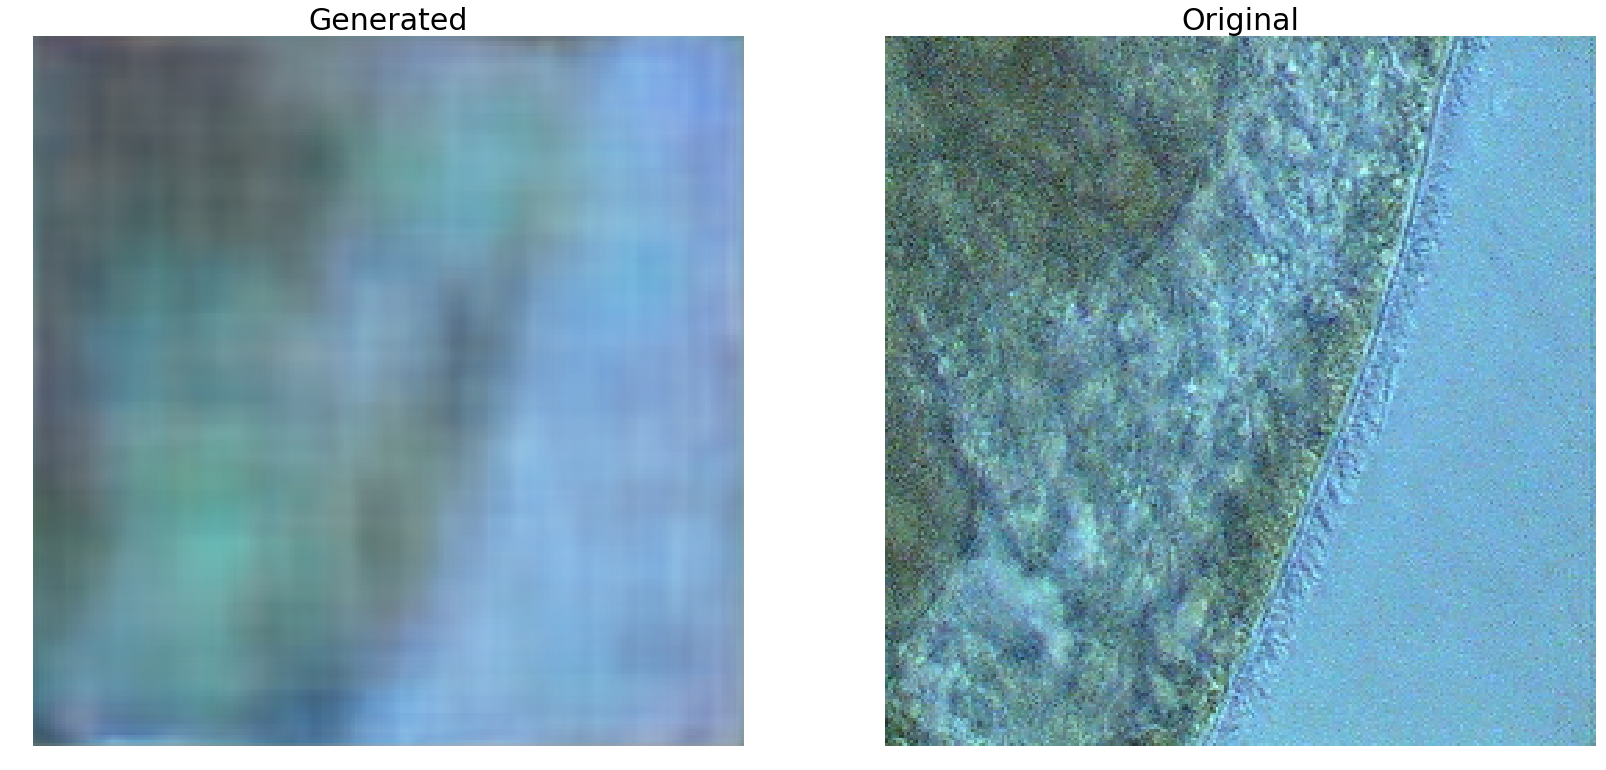

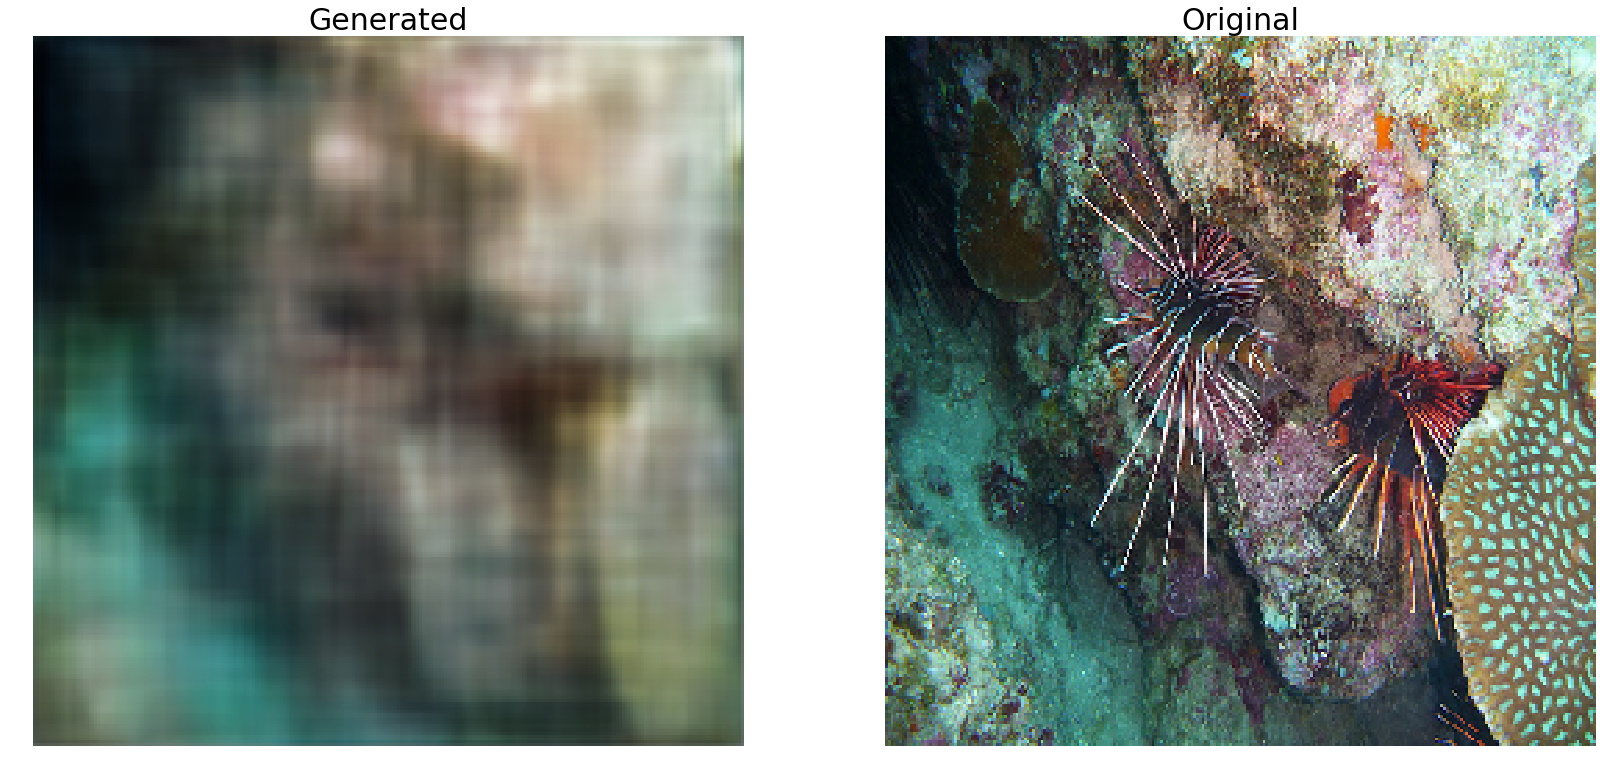

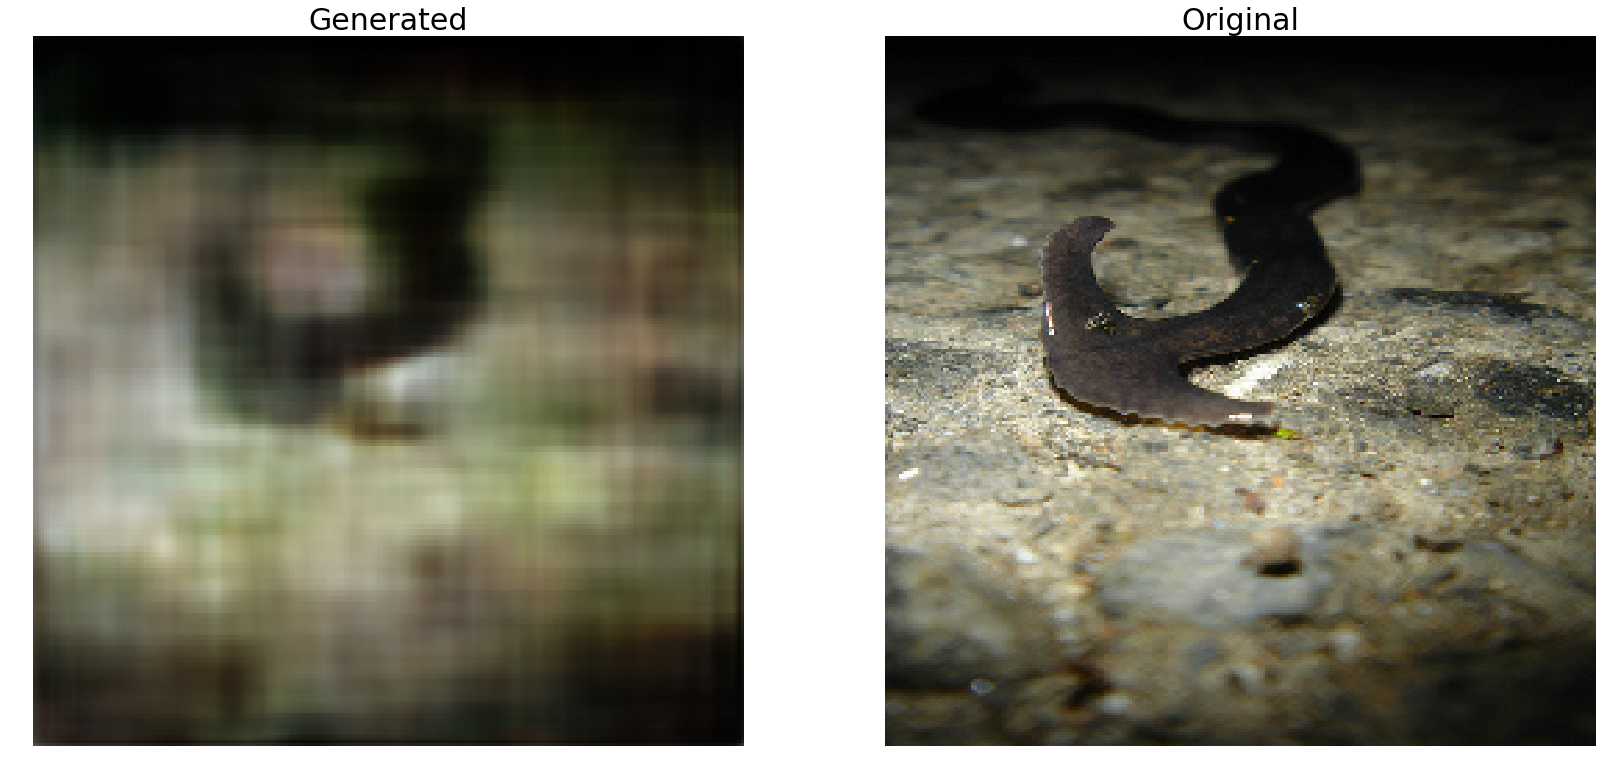

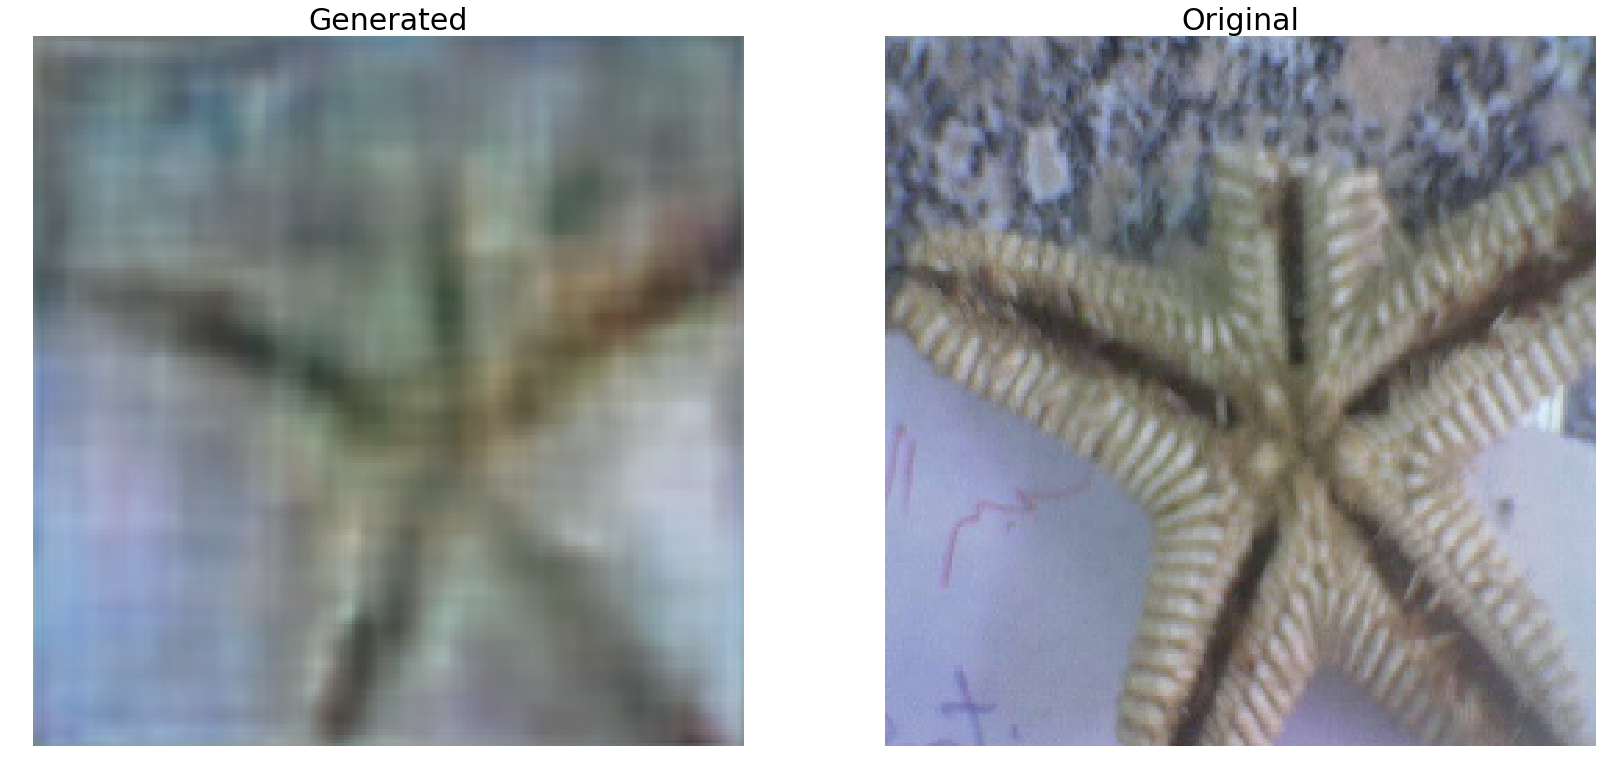

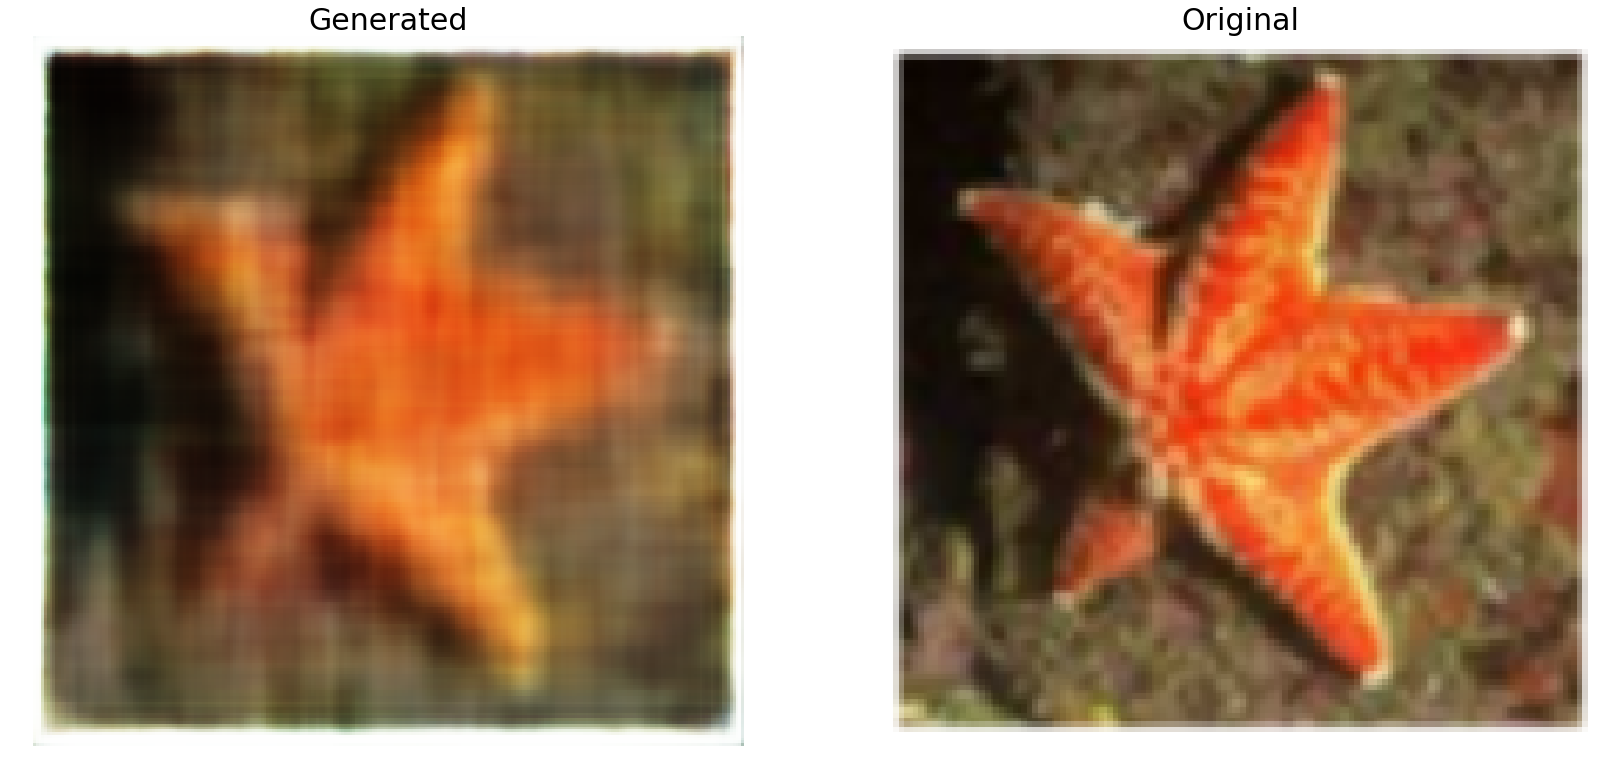

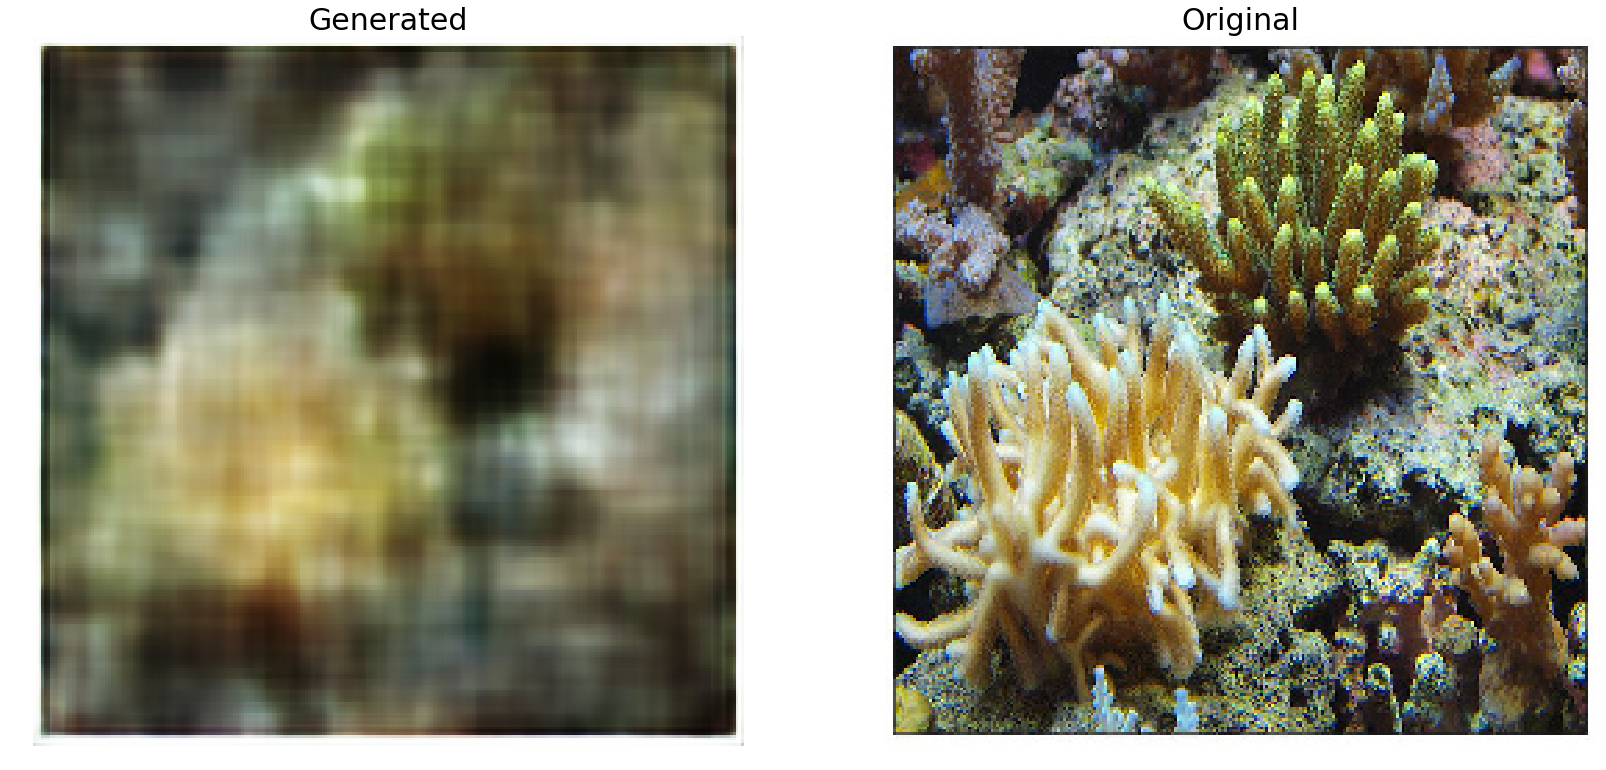

In [203]:
for i in range(10):
    show_image(i, f, images, save="plots/1000/train_{}.png".format(i))

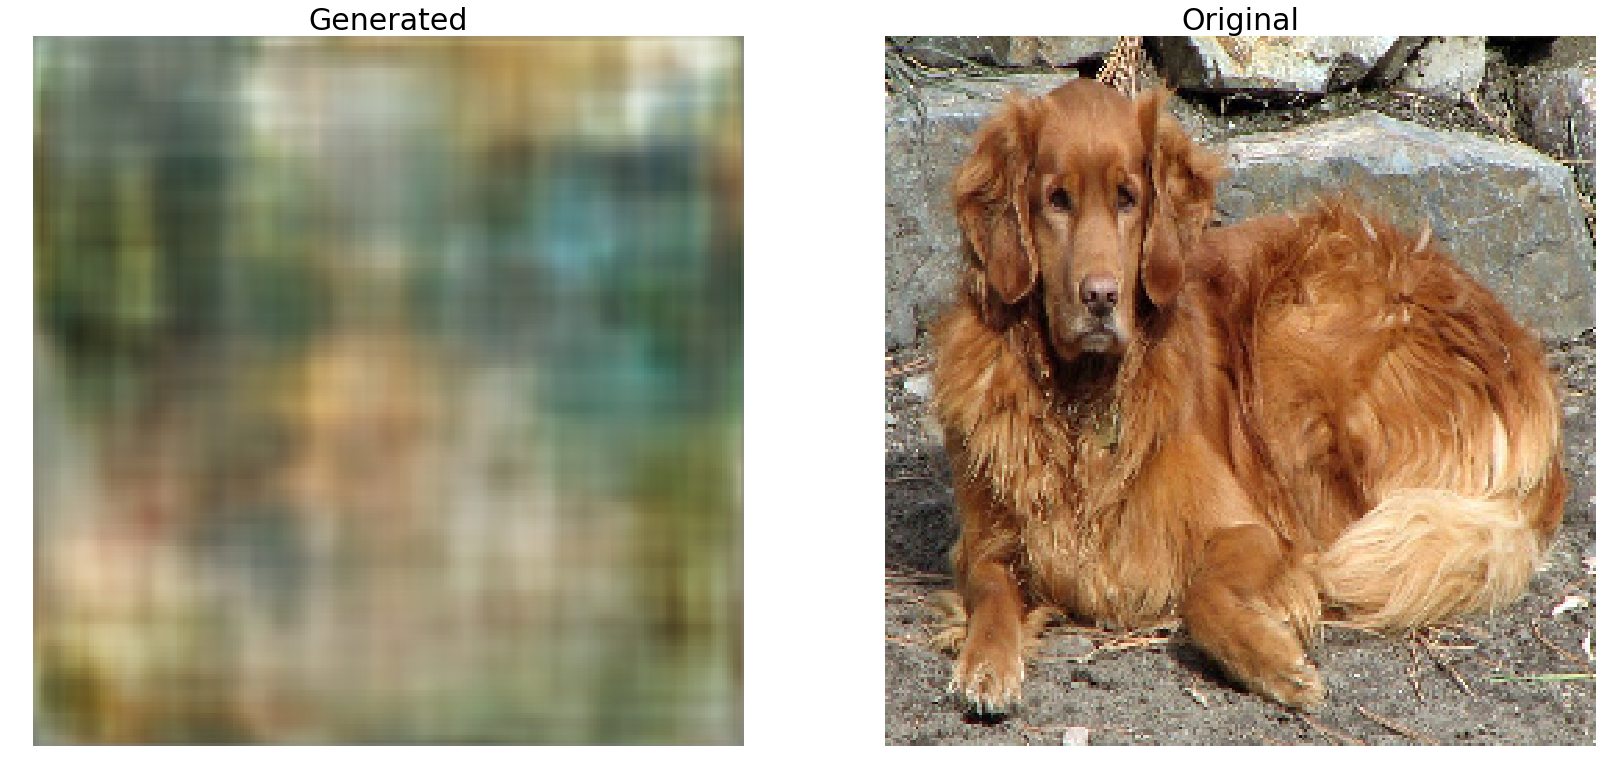

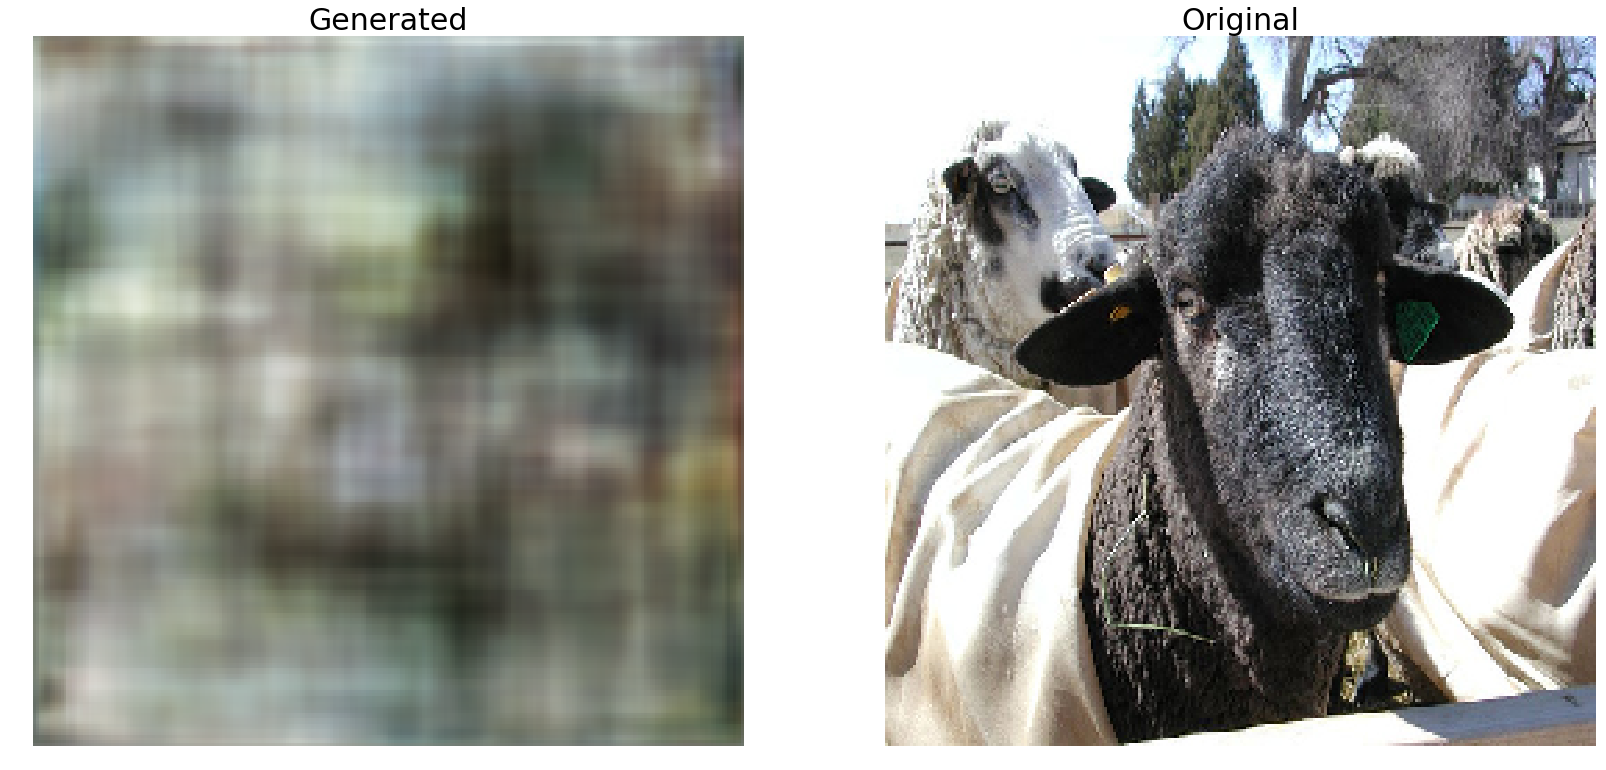

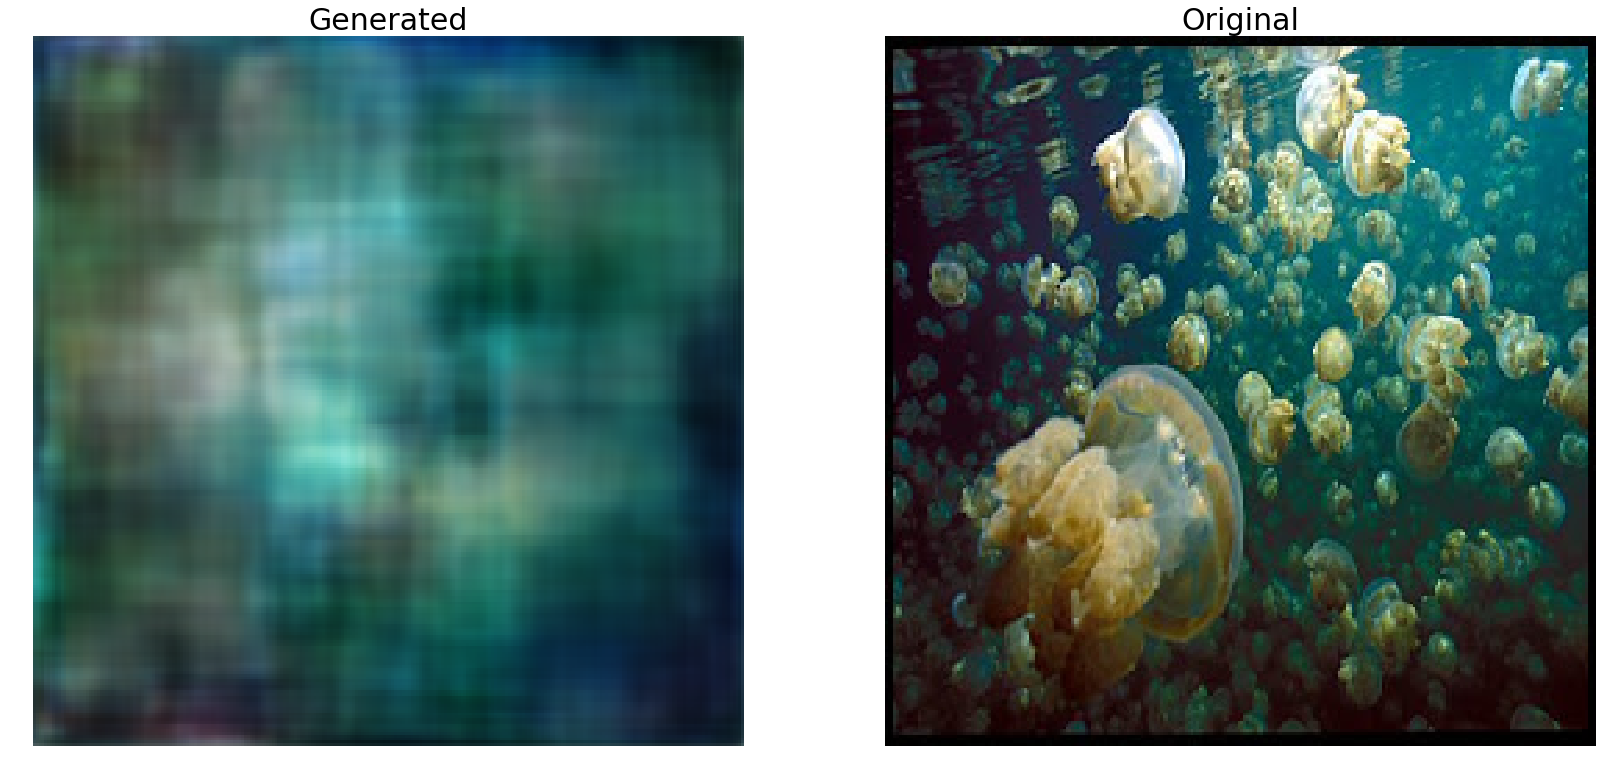

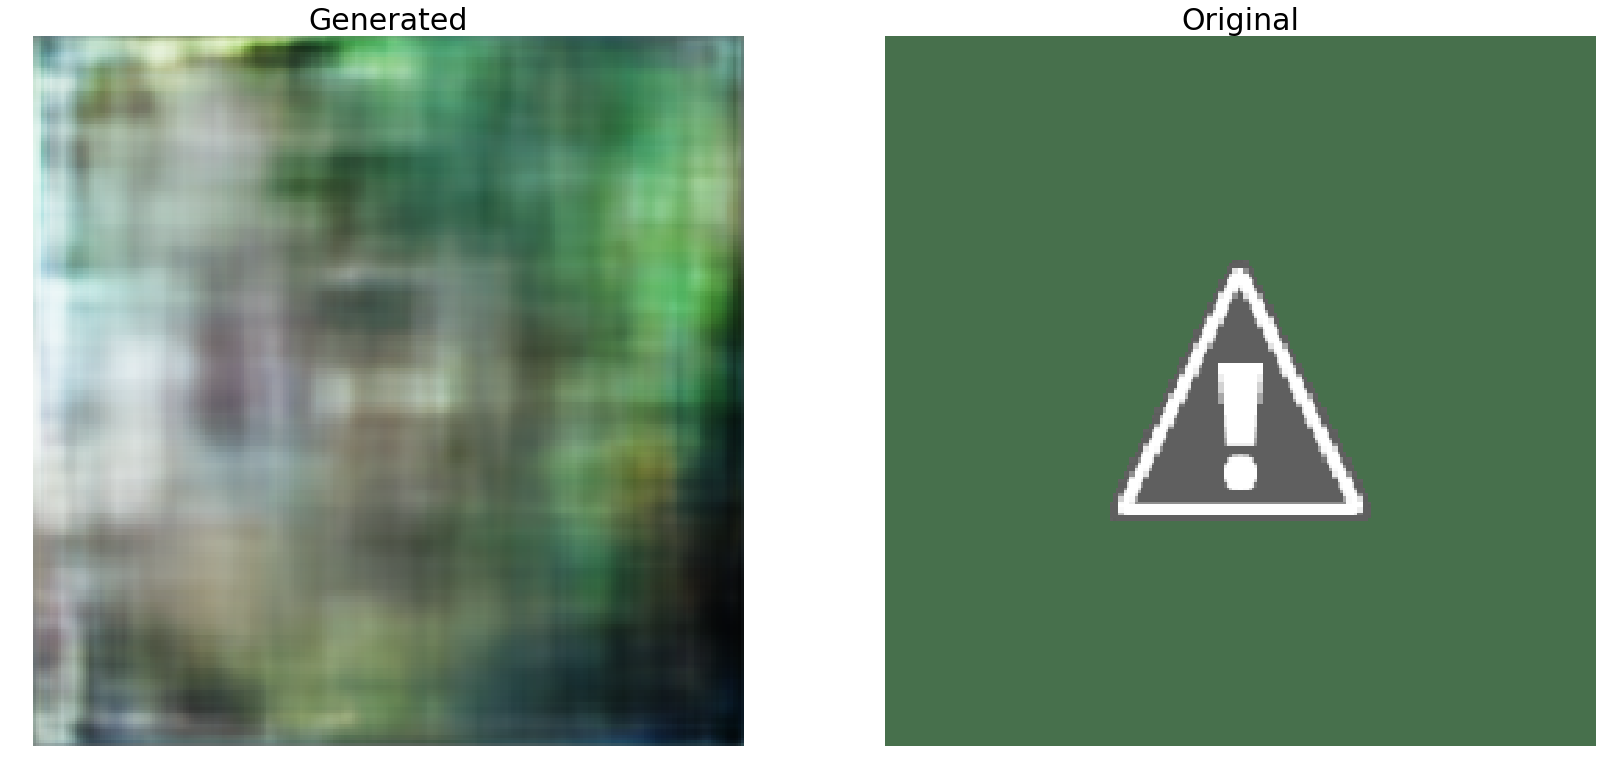

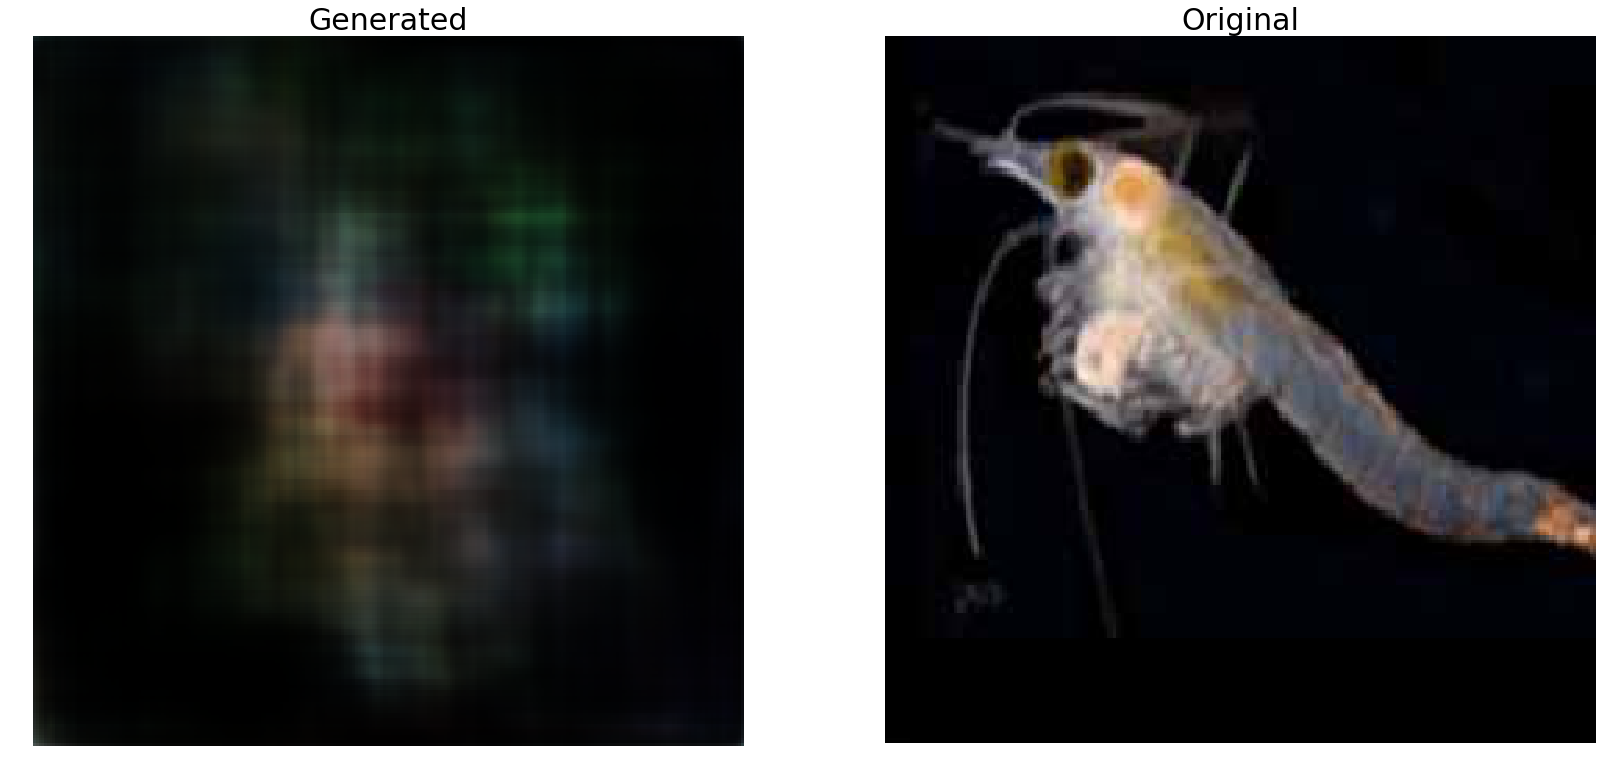

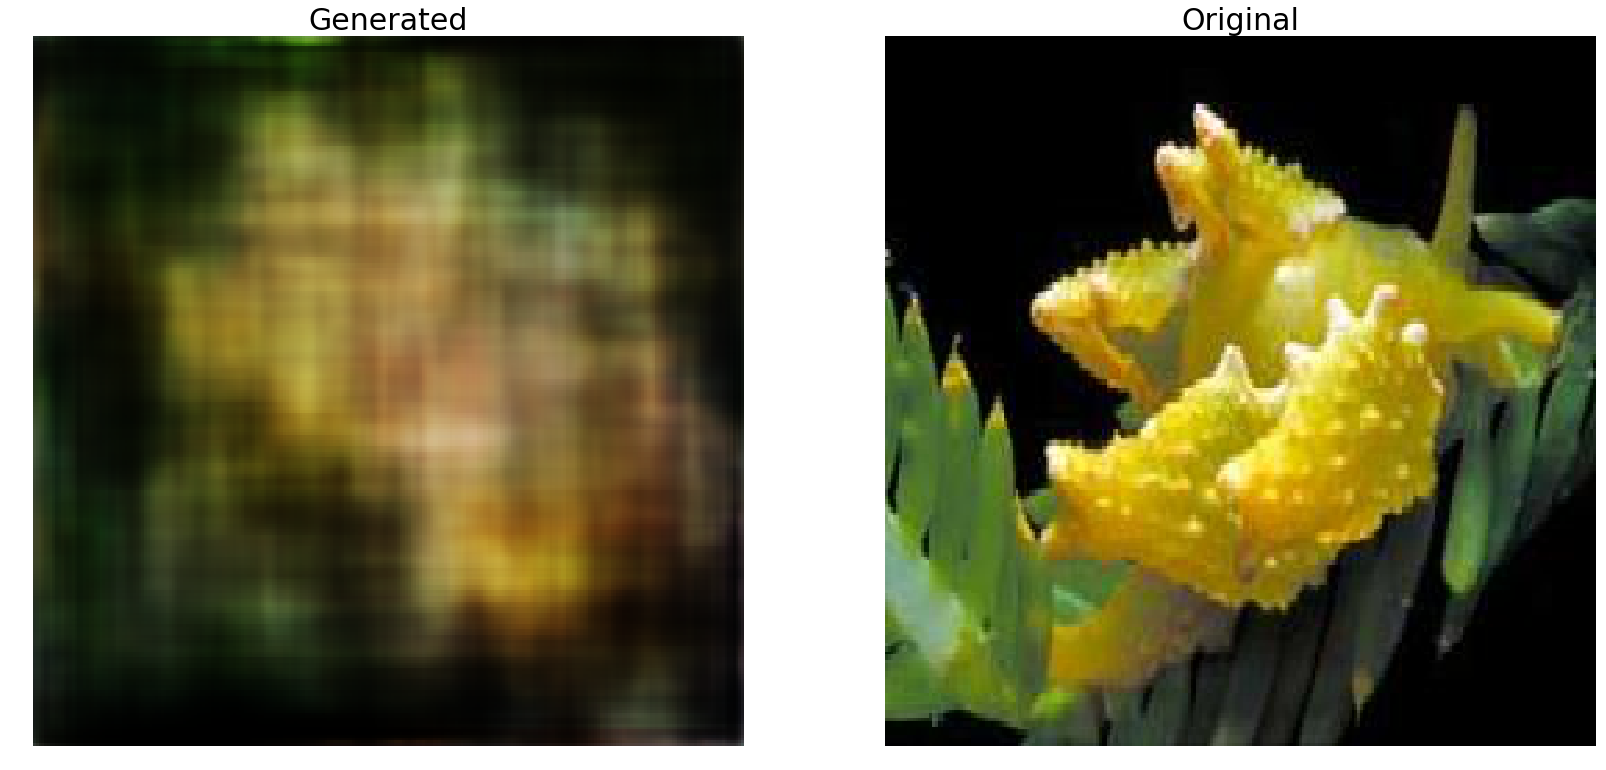

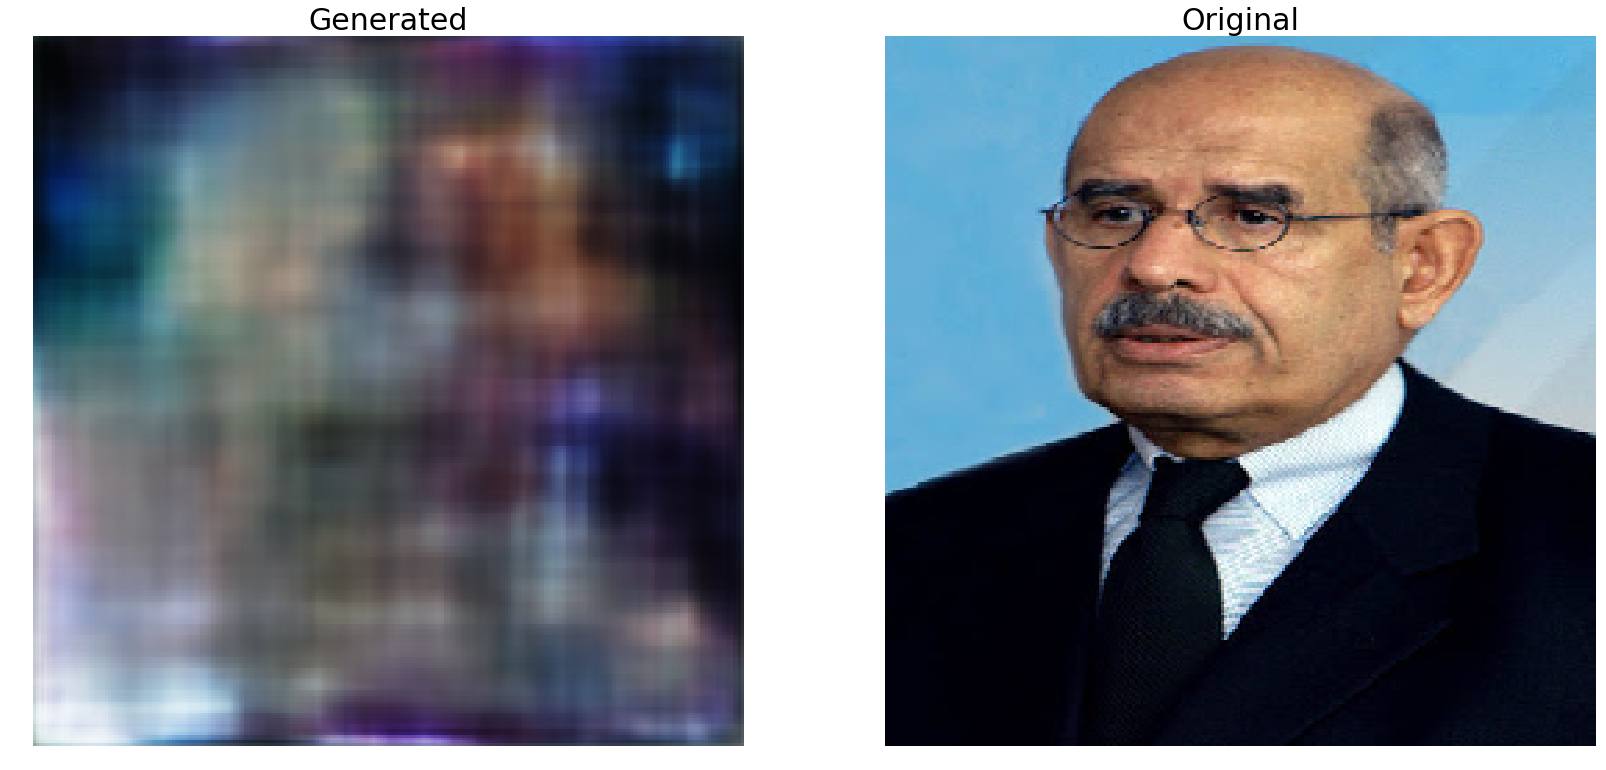

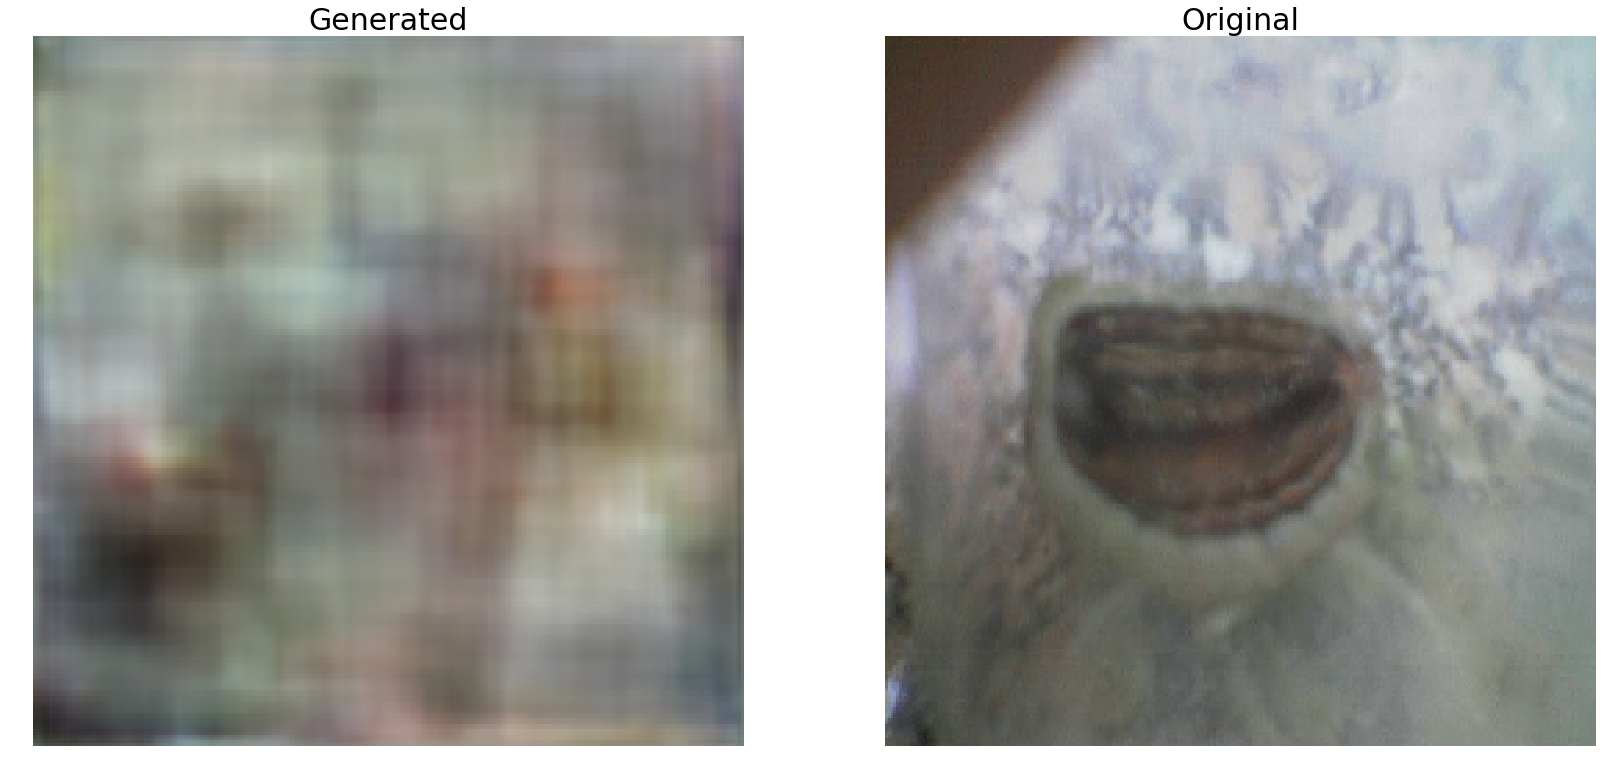

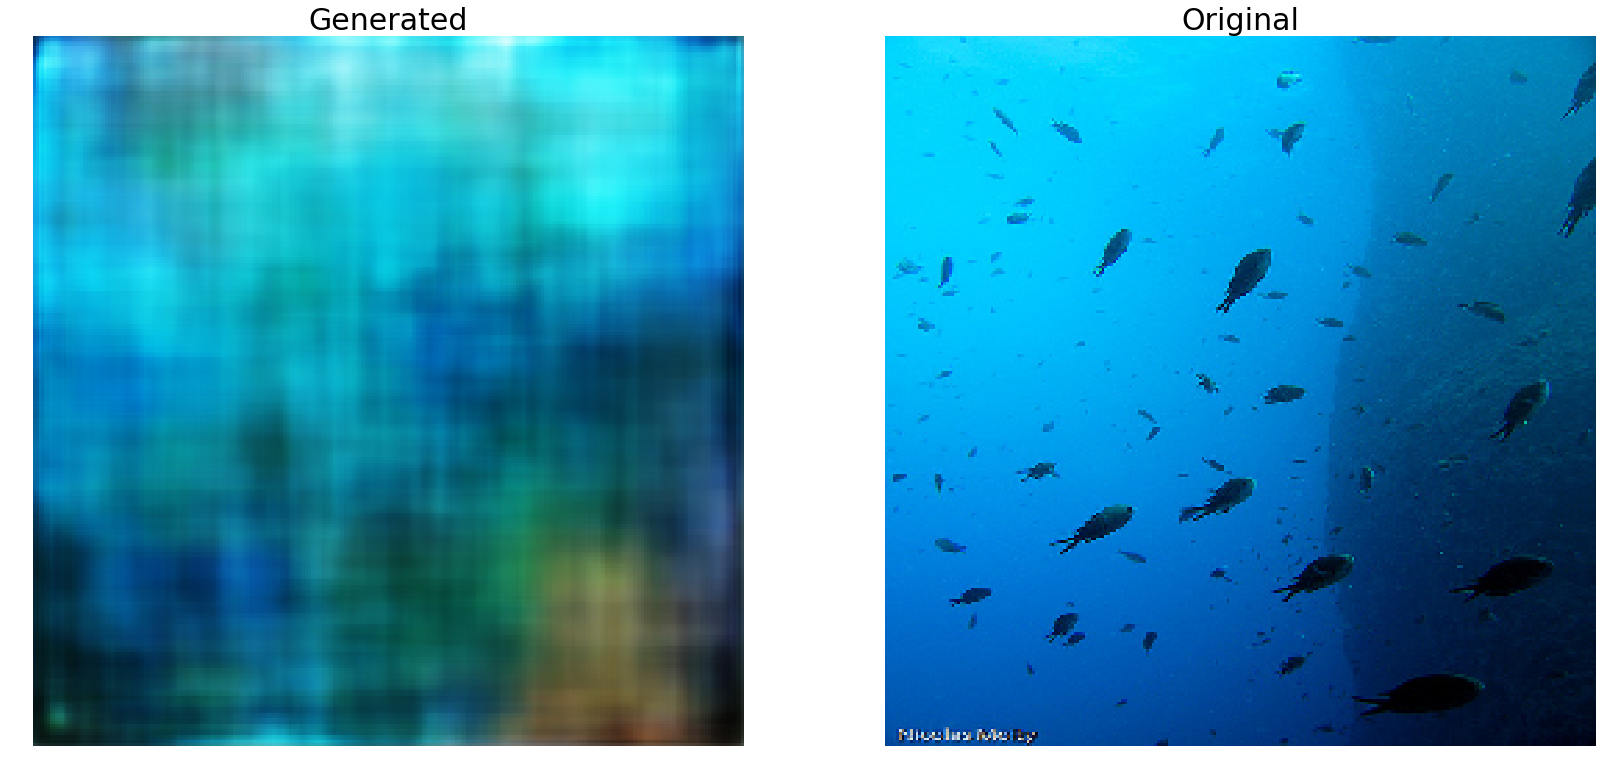

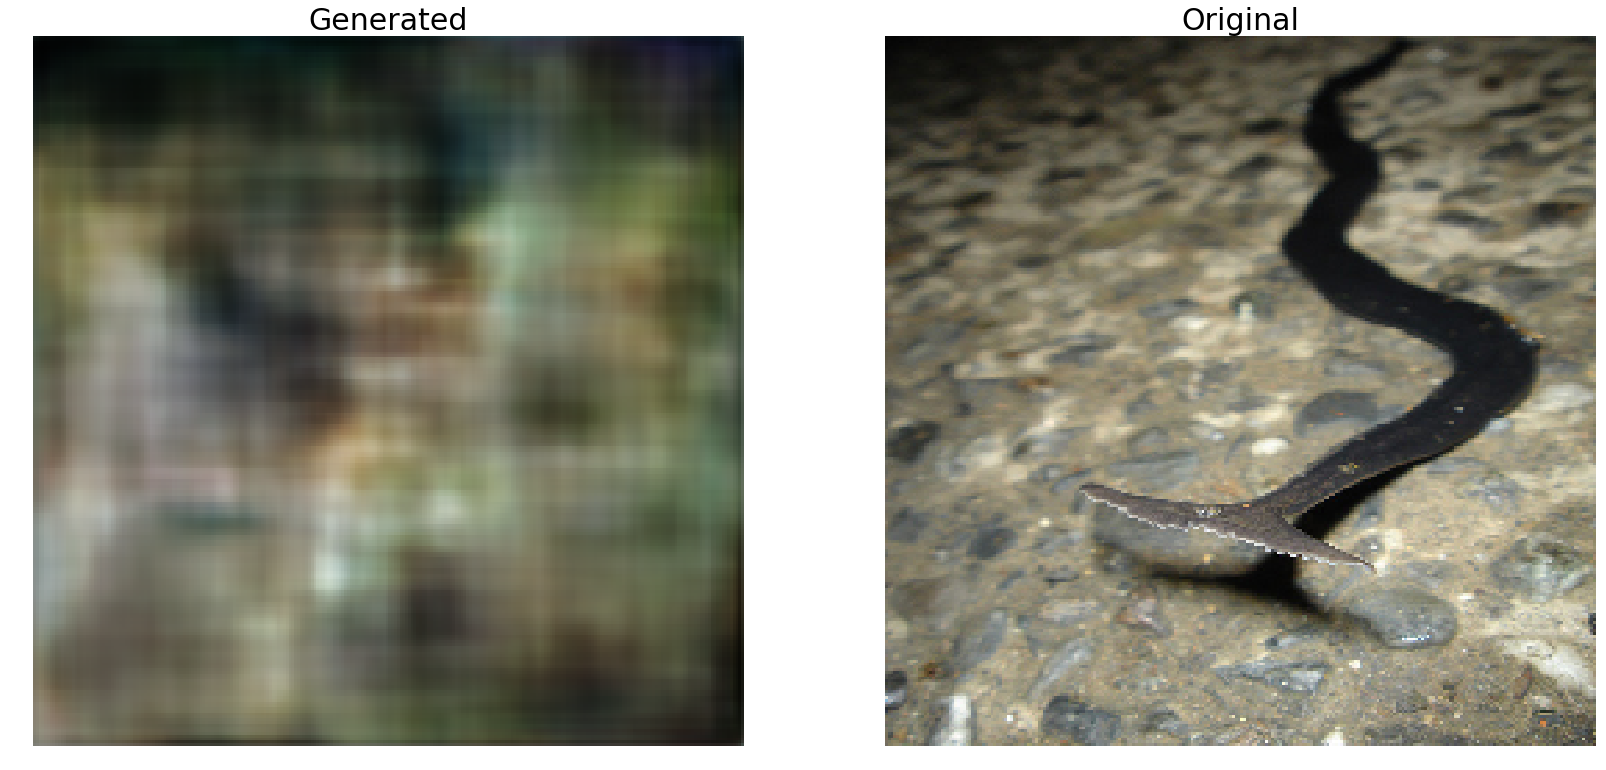

In [204]:
for i in range(10):
    show_image(i, test_f, test_images, save="plots/1000/test_{}.png".format(i))

In [ ]:
decoded_img = autoencoder.predict(np.random.normal(0, 1, size=[1, 2048]))
plt.figure(figsize=(28, 28))
plt.subplot(1, 2, 1)
plt.imshow(decoded_img.reshape(size, size, 3))
plt.title('Generated', fontsize=30)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(small_out)
plt.title('Original', fontsize=30)
plt.axis('off')
#plt.tight_layout()
plt.savefig("tst.png")
plt.show()

In [ ]:
autoencoder.save('1000.model')